In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
import pathlib
data_dir = ""

In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos.tar', origin=dataset_url, cache_dir = '.', untar=True)
data_dir = pathlib.Path(data_dir).with_suffix('')

In [5]:
# Constants:
BATCH_SIZE = 32
IMG_HEIGHT = 180
IMG_WIDTH = 180
EPOCHS = 15

In [5]:
# Set up training tf Datastructure

if not data_dir or data_dir == '':
    data_dir = './datasets/flower_photos'
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(IMG_HEIGHT, IMG_WIDTH),
  batch_size=BATCH_SIZE)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [6]:
# Set up validation tf Datastructure
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(IMG_HEIGHT, IMG_WIDTH),
  batch_size=BATCH_SIZE)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [7]:
class_names = train_ds.class_names
class_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [8]:
# Enable cache prefetch 
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [9]:
num_classes = len(class_names)


model = Sequential([
  layers.RandomFlip("horizontal",
                      input_shape=(IMG_HEIGHT,
                                  IMG_WIDTH,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1),
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [10]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=EPOCHS
)

Epoch 1/15
92/92 [==============================] - 17s 170ms/step - loss: 1.3456 - accuracy: 0.4257 - val_loss: 1.0997 - val_accuracy: 0.5572
Epoch 2/15
92/92 [==============================] - 16s 174ms/step - loss: 1.0688 - accuracy: 0.5715 - val_loss: 1.0199 - val_accuracy: 0.5872
Epoch 3/15
92/92 [==============================] - 17s 181ms/step - loss: 0.9588 - accuracy: 0.6247 - val_loss: 0.9560 - val_accuracy: 0.6172
Epoch 4/15
92/92 [==============================] - 15s 167ms/step - loss: 0.8841 - accuracy: 0.6635 - val_loss: 0.9399 - val_accuracy: 0.6213
Epoch 5/15
92/92 [==============================] - 16s 172ms/step - loss: 0.8506 - accuracy: 0.6659 - val_loss: 0.8606 - val_accuracy: 0.6376
Epoch 6/15
92/92 [==============================] - 16s 174ms/step - loss: 0.8001 - accuracy: 0.6955 - val_loss: 0.8139 - val_accuracy: 0.6798
Epoch 7/15
92/92 [==============================] - 16s 178ms/step - loss: 0.7500 - accuracy: 0.7057 - val_loss: 0.8965 - val_accuracy: 0.6526

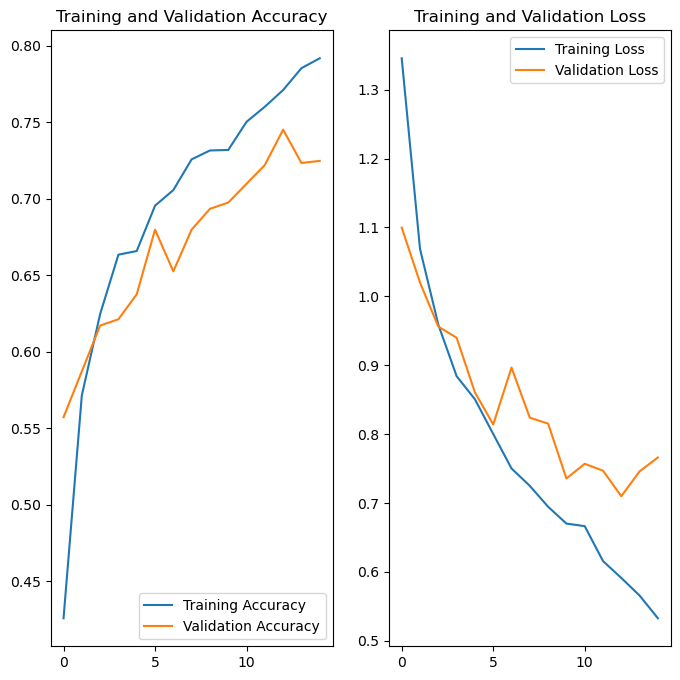

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [14]:
sunflower_url = "https://media.istockphoto.com/id/174655938/photo/rose-background.jpg?s=612x612&w=0&k=20&c=nWPBU5SpfPYmRDtlTlVNzRB-SFRnFAHeeWh08b-YY14="
sunflower_path = tf.keras.utils.get_file('rrw43er34rr', origin=sunflower_url)

img = tf.keras.utils.load_img(
    sunflower_path, target_size=(IMG_HEIGHT, IMG_WIDTH)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 27ms/step
This image most likely belongs to roses with a 99.73 percent confidence.


In [15]:
model.save(f"../models/flowerspredict")

INFO:tensorflow:Assets written to: ../models/flowerspredict/assets


INFO:tensorflow:Assets written to: ../models/flowerspredict/assets
